In [16]:
#Kaitlyn Kirt, CMOR 220, Spring 2024, SVD - data compression Project
#Project9.ipynb
#This script produces a low-dimensional approximation for image clarity
#Last Modified: April 9th, 2024

In [17]:
import numpy as np
import matplotlib.pyplot as plt

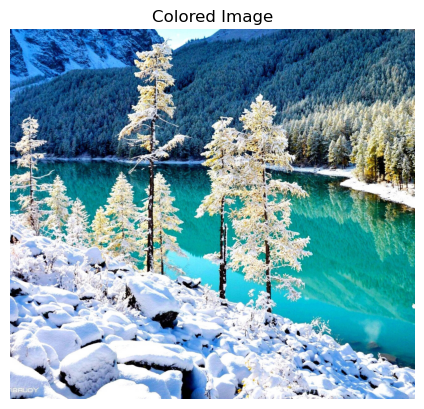

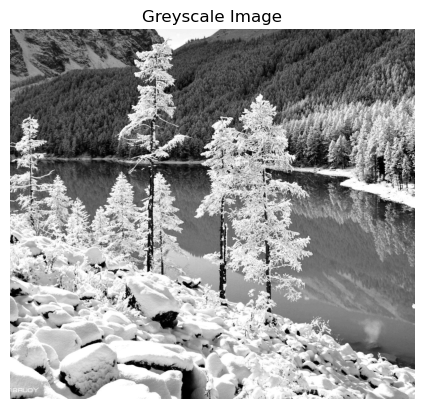

In [18]:
AOrig=plt.imread('image-2.jpg') 
A=AOrig/255
plt.figure
plt.imshow(A)
plt.axis('off')
plt.title('Colored Image')
plt.show()

AGrey=0.2989*A[:,:,0]+0.5870*A[:,:,1]+0.1140*A[:,:,2] #changes colors to greyscale
plt.imshow(AGrey,cmap='gray')
plt.axis('off')
plt.title('Greyscale Image')
plt.show()

In [19]:
def SVDDecomp(A): 
#inputs: A
#outputs: none
#description: this script factors a matrix into differnt component matrices
    [U,D,V]=np.linalg.svd(A) #takes the SVD decomposition of an array
    Df=np.zeros([U.shape[1],V.shape[0]]) #returns an nxm zero array
    if U.shape[1]<V.shape[0]: #assumes Df has more columns than rows
        Df[0:U.shape[1],0:U.shape[1]]= np.diag(D)
    else: #assumes DF has more rows than columns
        Df[0:V.shape[0],0:V.shape[0]]= np.diag(D)
    return [U,Df,V]

In [20]:
def BestRank(A,tol):
#inputs: A,tol
#outputs: none
#description: this script finds the best approximation for the greyscale image 
    [U,Df,V]=SVDDecomp(A) #call the SVD function
    x=min(Df.shape) #finds the minimum value (singular values)
    Sums=np.zeros(x) #preallocation
    for n in range(0,x): 
        Vals=np.diag(Df)[(x-1)-n::] #picks last r values and returns the diagonal values of Df in a 1D vector 
        Sums[(x-1)-n]=np.sqrt(sum(Vals**2)) #sum the values produced
    Idx=np.argmin(Sums-tol>0) #finds the index of the extry in Sums where the summation-tolerance is greater than 0
    R=Idx+1 #equation that gives the best rank
    return R

In [21]:
def Compress(A,Factor):
#inputs: A,Factor
#outputs: none 
#description: this script compresses the data 
    [U,Df,V]=SVDDecomp(A) #call the SVD function
    N=np.sum(np.diagonal(Df)>0) #sums the number of singular values are in the full version of Df                    
    r=np.int64(N/Factor) #convert r to an integer
    Ac=U[:,0:r]@Df[0:r,0:r]@V[0:r,:] #builds the compressed array
    Ac=np.clip(Ac,0,1) #ensures all values are between 0 and 1
    return Ac

True


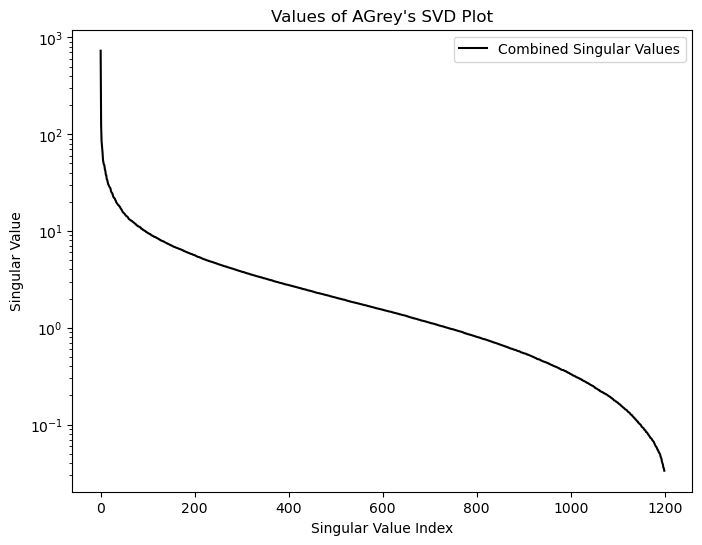

Best R-rank Approximation:188 with tol 70


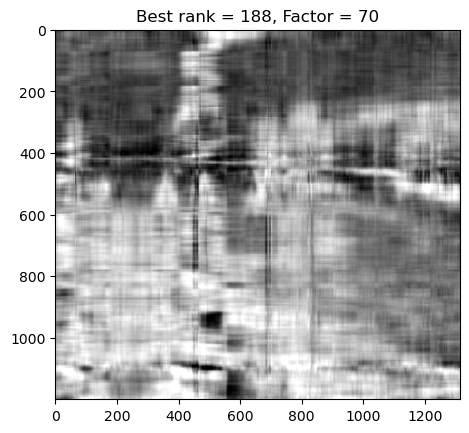

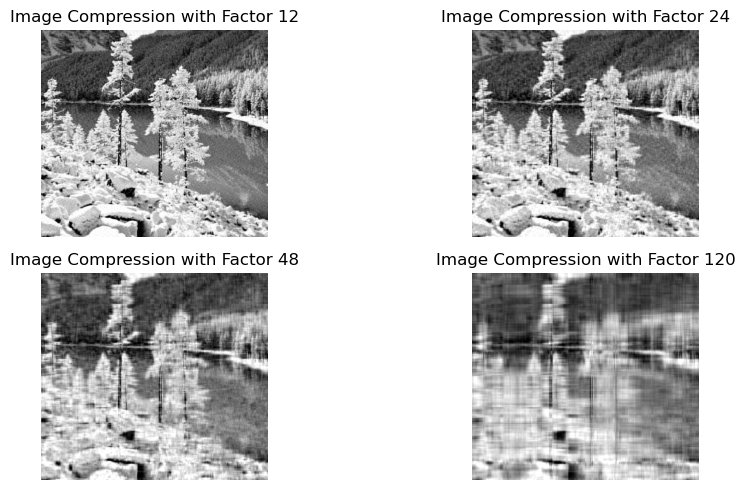

In [36]:
[U,Df,V]=SVDDecomp(AGrey)
ATst = U @ Df @ V
print(np.allclose(AGrey,ATst)) #tells whether two input arrays are identical
SVD=np.diag(Df)

plt.figure(figsize=(8,6))
plt.yscale('log') #alters the y-axis scaling
plt.plot(SVD,'k',label="Combined Singular Values")
plt.title("Values of AGrey's SVD Plot")
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Value")
plt.legend()
plt.show()


R=BestRank(AGrey, 70) #calls the BestRank function with tol of 70
factor = N /r # find compression factor
Ac=Compress(AGrey,Factor) #calls the compress function
plt.imshow(Ac, cmap = "gray") #generates the greyscale image
plt.title("Best rank = " + str(R) + ", Factor = 70")
print("Best R-rank Approximation:" + str(R)+ " with tol 70")
  


compressionfactors=[12,24,48,120] #denotes the 4 compression factors 
plt.figure(figsize=(15,5))
for n,Factor in enumerate(compressionfactors):
    Ac=Compress(AGrey, Factor) #calls the compress function
    plt.subplot(2,2,n+1) #creates a 2x2 oriented subplot
    plt.imshow(Ac,cmap='grey') #generates the greyscale image
    plt.axis('off')
    plt.title('Image Compression with Factor = ' + str(Factor))
    plt.tight_layout() #condenses the layout of the subplots
plt.show()